<a href="https://colab.research.google.com/github/kuan9307/Early-Diagnosis-of-Alzheimer-s-Disease-using-Deep-Learning-and-Neuroimaging/blob/main/VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive

import sys
import tensorflow as tf
import keras
import sklearn
import pandas as pd
import seaborn as sns

print("Python Version:", sys.version)
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)
print("Scikit Learn Version:", sklearn.__version__)
print("Pandas Version:", pd.__version__)
print("Numpy Version:", np.__version__)
print("Seaborn Version:", sns.__version__)
print("Cv2 Version:", cv2.__version__)

Python Version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
TensorFlow Version: 2.14.0
Keras Version: 2.14.0
Scikit Learn Version: 1.2.2
Pandas Version: 1.5.3
Numpy Version: 1.23.5
Seaborn Version: 0.12.2
Cv2 Version: 4.8.0


In [ ]:
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/Data_reduce/'

#Folders
categories_train = ['NonDemented/train', 'MildDementia/train', 'VeryMildDementia/train']

images_train = []
labels_train = []

for category in categories_train:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_train.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_train.append(corrected_category)

Mounted at /content/drive
NonDemented/train
MildDementia/train
VeryMildDementia/train


In [ ]:
#Folders test
categories_test = ['NonDemented/test', 'MildDementia/test', 'VeryMildDementia/test']

images_test = []
labels_test = []

for category in categories_test:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_test.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_test.append(corrected_category)

NonDemented/test
MildDementia/test
VeryMildDementia/test


In [ ]:
#Folders val
categories_validation = ['NonDemented/validation', 'MildDementia/validation', 'VeryMildDementia/validation']

images_validation = []
labels_validation = []

for category in categories_validation:
  print(category)
  path = os.path.join(base_path, category)
  for img in os.listdir(path):
        #Load
        img_path = os.path.join(path, img)
        gray_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            #Convert to RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

        #Resize for inception
        resized_image = cv2.resize(rgb_image, (256, 256))

        images_validation.append(resized_image)
        corrected_category = category.split('/')[0]
        labels_validation.append(corrected_category)

NonDemented/validation
MildDementia/validation
VeryMildDementia/validation


In [ ]:
images_train = np.array(images_train)
labels_train = np.array(labels_train)

images_test = np.array(images_test)
labels_test = np.array(labels_test)

images_val = np.array(images_validation)
labels_val = np.array(labels_validation)

In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)
print(images_val.shape)
print(labels_val.shape)

(4200, 256, 256, 3)
(4200,)
(900, 256, 256, 3)
(900,)
(900, 256, 256, 3)
(900,)


In [ ]:
images_train = images_train / 255.0
images_test = images_test / 255.0
images_val = images_val / 255.0

categories = ['NonDemented', 'MildDementia', 'VeryMildDementia']
label_dict = {category: idx for idx, category in enumerate(categories)}

numeric_labels_train = [label_dict[label] for label in labels_train]
numeric_labels_test = [label_dict[label] for label in labels_test]
numeric_labels_val = [label_dict[label] for label in labels_val]

labels_train = tf.keras.utils.to_categorical(numeric_labels_train, num_classes=len(categories))
labels_test = tf.keras.utils.to_categorical(numeric_labels_test, num_classes=len(categories))
labels_val = tf.keras.utils.to_categorical(numeric_labels_val, num_classes=len(categories))

In [ ]:
images_train.shape, images_test.shape, images_val.shape

((4200, 256, 256, 3), (900, 256, 256, 3), (900, 256, 256, 3))

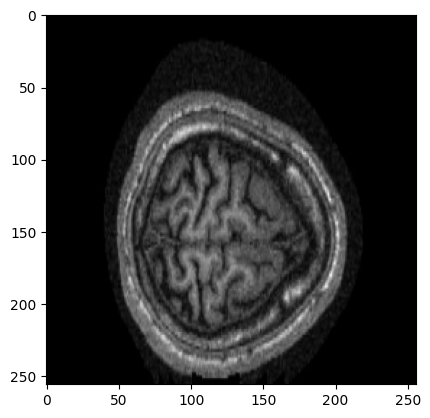

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images_train[0])

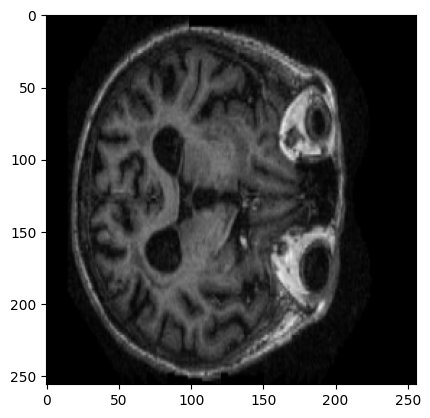

In [ ]:
plt.imshow(images_test[0])

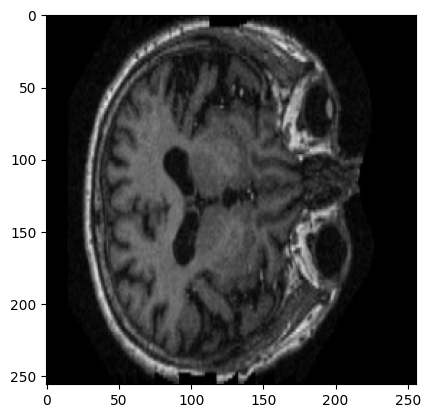

In [ ]:
plt.imshow(images_val[0])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='accuracy',  # or 'val_accuracy' depending on where you want to monitor accuracy
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    mode='max',           # 'max' means training will stop when the accuracy reaches the maximum
    verbose=1             # Print a message when training is stopped
)

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

# Input shape
input_shape = (256, 256, 3)

# Import the pertrained weight of the VGG16, "include_top=False" stand for not including full connect layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freezing the weight of the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Obtain VGG16 model's output
vgg_output = base_model.output

# Flatten the VGG16 model output
flatten_layer = Flatten()(vgg_output)

# Adding the customized full-connected layer
dense_layer = Dense(512, activation='relu')(flatten_layer)
dense_layer = Dense(512, activation='relu')(dense_layer)
dense_layer = Dense(3, activation='softmax')(dense_layer)  # 3 class

# Build the new model, integrate the VGG model with the full-connect layer
model = Model(inputs=base_model.input, outputs=dense_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(images_train, labels_train, epochs=20, batch_size=30,verbose=1,validation_data=(images_val,labels_val),callbacks=[early_stopping])

Epoch 1/20
140/140 [==============================] - 59s 410ms/step - loss: 1.2539 - accuracy: 0.5660 - val_loss: 0.5875 - val_accuracy: 0.7678
Epoch 2/20
140/140 [==============================] - 57s 407ms/step - loss: 0.4307 - accuracy: 0.8381 - val_loss: 0.3810 - val_accuracy: 0.8656
Epoch 3/20
140/140 [==============================] - 58s 414ms/step - loss: 0.3220 - accuracy: 0.8740 - val_loss: 0.3801 - val_accuracy: 0.8500
Epoch 4/20
140/140 [==============================] - 60s 429ms/step - loss: 0.2095 - accuracy: 0.9240 - val_loss: 1.0141 - val_accuracy: 0.6600
Epoch 5/20
140/140 [==============================] - 57s 405ms/step - loss: 0.2186 - accuracy: 0.9210 - val_loss: 0.2742 - val_accuracy: 0.9011
Epoch 6/20
140/140 [==============================] - 55s 396ms/step - loss: 0.1452 - accuracy: 0.9481 - val_loss: 0.3090 - val_accuracy: 0.8744
Epoch 7/20
140/140 [==============================] - 60s 433ms/step - loss: 0.1286 - accuracy: 0.9512 - val_loss: 0.2380 - val_ac

In [ ]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(20)

    fig = plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

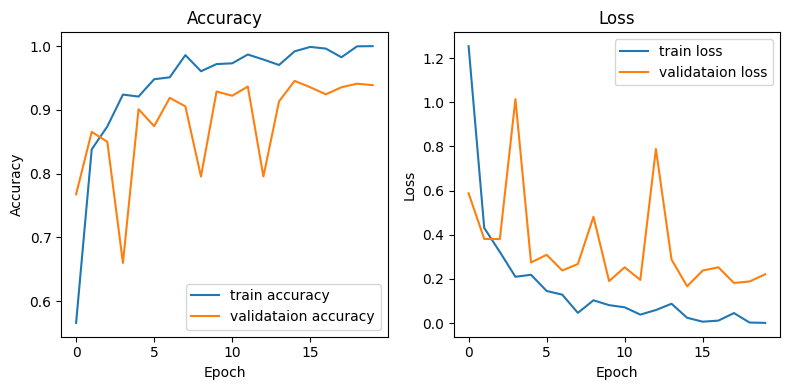

In [ ]:
# Display learning curves
display_learning_curves(history)

In [ ]:
model.evaluate(images_test, labels_test)
model.save('my_model.h5')

29/29 [==============================] - 11s 386ms/step - loss: 0.2371 - accuracy: 0.9389


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(images_test)

29/29 [==============================] - 7s 246ms/step


In [ ]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(labels_test, axis=1)
print(y_pred_classes[0])
print(y_true_classes[0])

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate F1 score, precision, recall, and other metrics
classification_rep = classification_report(y_true_classes, y_pred_classes)
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Print the results
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       300
           1       0.96      1.00      0.98       300
           2       0.90      0.97      0.93       300

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

Confusion Matrix:
 [[255  11  34]
 [  0 300   0]
 [  7   3 290]]


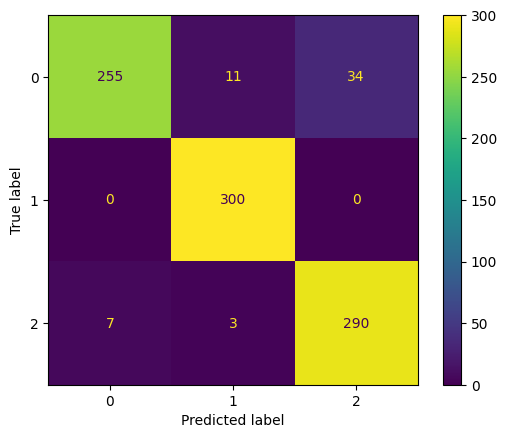

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(confusion_matrix(y_true_classes, y_pred_classes))
disp.plot()